## Import Package

In [4]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt
import logging

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.logThreads = False
logging.logProcesses = False


chapters = ['chapter01', 'chapter02', 'chapter03']
sys.path.append(os.path.abspath(f'../code/'))

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)


import tic_tac_toe as c1 
import ten_armed_testbed as c2
import grid_world as c3
import chapter04 as c4



# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

代码来自https://github.com/ShangtongZhang/reinforcement-learning-an-introduction

## chapter 1

In [23]:
state = c1.State()
print(f'state.data=\n{state.data}')
print(f'state.hash_val={state.hash_val}')
print(f'state.is_end()={state.is_end()}') 
state.print_state()

state.data=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
state.hash_val=None
state.is_end()=False
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------


In [24]:
states = c1.get_all_states() 
print(len(states))

5478


In [25]:
# check hash_val


state = c1.State()
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) )
state = state.next_state(0, 0, 1)
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) + np.power(3, 8))

9841.0 9841
16402.0 16402


In [26]:
i = 0 
for key, value in states.items():
    i = i+1
    if i>=11: break
    state, is_end = value
    print('-'*20, i, key, is_end, '-'*20)
    state.print_state()

-------------------- 1 9841.0 False --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 False --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 False --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 False --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 False --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 False --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0 False ----------

In [27]:
## check player

player = c1.Player(epsilon=0)
player.set_symbol(1)
print(f'len(player.estimations)={len(player.estimations)}') 
states = c1.get_all_states() 

i = 0 
for hash_val, value in player.estimations.items():
    i = i+1
    if i>=11: break
    print('-'*20, i, hash_val, value, '-'*20)
    states[hash_val][0].print_state()

len(player.estimations)=5478
-------------------- 1 9841.0 0.5 --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 0.5 --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 0.5 --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0

In [7]:
c1.train(int(1e5))

Epoch 1000, player 1 winrate: 0.19, player 2 winrate: 0.08, tie_rate: 0.73
Epoch 2000, player 1 winrate: 0.18, player 2 winrate: 0.08, tie_rate: 0.74
Epoch 3000, player 1 winrate: 0.20, player 2 winrate: 0.09, tie_rate: 0.71
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.07, tie_rate: 0.78
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.06, tie_rate: 0.81
Epoch 6000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [8]:
c1.compete(int(1e3))

load policy from _policy_first.bin
load policy from _policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [9]:
c1.play()

load policy from _policy_second.bin
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:w
-------------
| 0 | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:x
-------------
| 0 | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| x | * | 0 | 
-------------
Input your position:e
-------------
| x | * | * | 
-------------
| 0 | x | 0 | 
-------------
| x | * | 0 | 
-------------
Input your position:d
-------------
| x | * | * | 
-------------
| x | x | * | 
-------------
| x | * | 0 | 
-------------
You lose!
Do you want to play again(y/n):n


In [10]:
c1.play(True)

load policy from _policy_second.bin
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:a
value of player 2:
-------------------------
| 0.4923 | 0.3752 | 0.4975 | 
-------------------------
|   *   | 0.5010 | 0.4941 | 
-------------------------
| 0.4996 | 0.4858 | 0.4918 | 
-------------------------
-------------
| 0 | 0 | 0 | 
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:c
value of player 2:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
|   *   |   x   | 0.4999 | 
-------------------------
| 0.5040 | 0.5036 |   *   | 
-------------------------
-------------
| 0 | 0 | 0 | 
-------------
| * | x | 0 | 
-------------
| x | 0 | * | 
-------------
Input your position:e
value of player 2:
-------------------------
| 0.5000 | 0.4500 |   *   | 
-------------------------
|   *   |   x   | 0.5000 | 
-------------------------
|   x   | 0.4500 | 

### 当Nongreedy动作，更新价值表

无论是否greedy，都进行更新价值表，会发生什么?

In [11]:
c1.train(int(4e4), always_update_value=True, policy_prefix='4e4_at')

Epoch 1000, player 1 winrate: 0.20, player 2 winrate: 0.07, tie_rate: 0.73
Epoch 2000, player 1 winrate: 0.20, player 2 winrate: 0.10, tie_rate: 0.71
Epoch 3000, player 1 winrate: 0.16, player 2 winrate: 0.08, tie_rate: 0.77
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.07, tie_rate: 0.78
Epoch 5000, player 1 winrate: 0.14, player 2 winrate: 0.06, tie_rate: 0.81
Epoch 6000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 13000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [12]:
c1.train(int(4e4), always_update_value=False, policy_prefix='4e4')

Epoch 1000, player 1 winrate: 0.42, player 2 winrate: 0.17, tie_rate: 0.41
Epoch 2000, player 1 winrate: 0.26, player 2 winrate: 0.10, tie_rate: 0.64
Epoch 3000, player 1 winrate: 0.19, player 2 winrate: 0.07, tie_rate: 0.74
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.06, tie_rate: 0.79
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.05, tie_rate: 0.82
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 7000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 8000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 10000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 11000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 12000, player 1 winrate: 0.07, player 2 winrate: 0.02, tie_rate: 0.91
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.02, tie_rate: 0.91
Epoch 14000, player 1

In [13]:
c1.train(int(1e5), always_update_value=False, policy_prefix='1e5')

Epoch 1000, player 1 winrate: 0.14, player 2 winrate: 0.03, tie_rate: 0.83
Epoch 2000, player 1 winrate: 0.17, player 2 winrate: 0.04, tie_rate: 0.79
Epoch 3000, player 1 winrate: 0.15, player 2 winrate: 0.04, tie_rate: 0.81
Epoch 4000, player 1 winrate: 0.14, player 2 winrate: 0.04, tie_rate: 0.82
Epoch 5000, player 1 winrate: 0.12, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.03, tie_rate: 0.86
Epoch 7000, player 1 winrate: 0.10, player 2 winrate: 0.03, tie_rate: 0.87
Epoch 8000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.87
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [14]:
c1.compete(int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4_at') 
c1.compete(int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4')
c1.compete(int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='1e5')

load policy from 4e4_at_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [15]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4_at') 
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_at_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [16]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [17]:
c1.compete(turns=1, player1_policy_prefix='1e5', player2_policy_prefix='4e4')

load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
value of player 1:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
| 0.4998 | 0.5000 | 0.4997 | 
-------------------------
| 0.5000 | 0.5000 | 0.5009 | 
-------------------------
value of player 2:
-------------------------
| 0.4943 | 0.4902 | 0.4939 | 
-------------------------
| 0.4921 | 0.5000 | 0.4913 | 
-------------------------
| 0.4926 | 0.4929 |   *   | 
-------------------------
value of player 1:
-------------------------
| 0.5000 | 0.4988 | 0.5000 | 
-------------------------
| 0.5000 |   x   | 0.5000 | 
-------------------------
| 0.4975 | 0.4995 |   *   | 
-------------------------
value of player 2:
-------------------------
| 0.4500 | 0.4500 | 0.5021 | 
-------------------------
| 0.4500 |   x   |   *   | 
-------------------------
| 0.4500 | 0.4500 |   *   | 
-------------------------
value of player 1:
-------------------------
| 0.1029 | 0.2391 |   x   | 
---

In [18]:
c1.compete(turns=1, player1_policy_prefix='4e4', player2_policy_prefix='4e4_at')

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
value of player 1:
-------------------------
| 0.5000 | 0.4998 | 0.5000 | 
-------------------------
| 0.4999 | 0.5027 | 0.5000 | 
-------------------------
| 0.5000 | 0.4996 | 0.5000 | 
-------------------------
value of player 2:
-------------------------
| 0.4729 | 0.3550 | 0.4988 | 
-------------------------
| 0.3938 |   *   | 0.3562 | 
-------------------------
| 0.4748 | 0.2725 | 0.4727 | 
-------------------------
value of player 1:
-------------------------
| 0.5000 | 0.5000 |   x   | 
-------------------------
| 0.4995 |   *   | 0.5000 | 
-------------------------
| 0.5000 | 0.4987 | 0.5084 | 
-------------------------
value of player 2:
-------------------------
| 0.5048 | 0.5000 |   x   | 
-------------------------
| 0.5000 |   *   | 0.4500 | 
-------------------------
| 0.4500 | 0.5000 |   *   | 
-------------------------
value of player 1:
-------------------------
|   x   | 0.5124 |   x   | 
-

In [19]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4_at') 

load policy from 4e4_at_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


## chapter 2

### figure 2.1

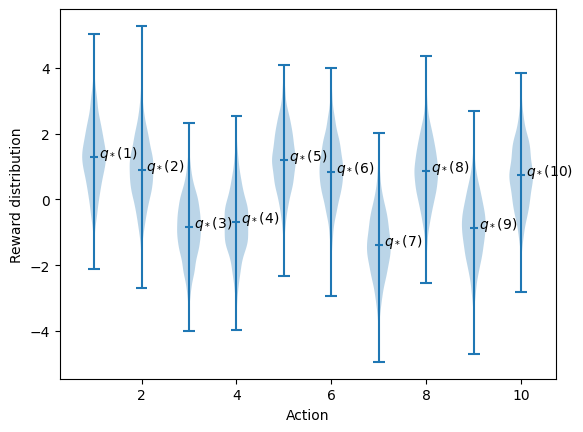

In [27]:
c2.figure_2_1(show=True) 

### figure 2.2

In [28]:
# c2.figure_2_2(show=True) 

Bandit(greedy, sample_averages)
    reward=1.02, best_action_rate=0.37
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.37, best_action_rate=0.77
Bandit(ε-greedy=0.01, sample_averages)
    reward=1.25, best_action_rate=0.54


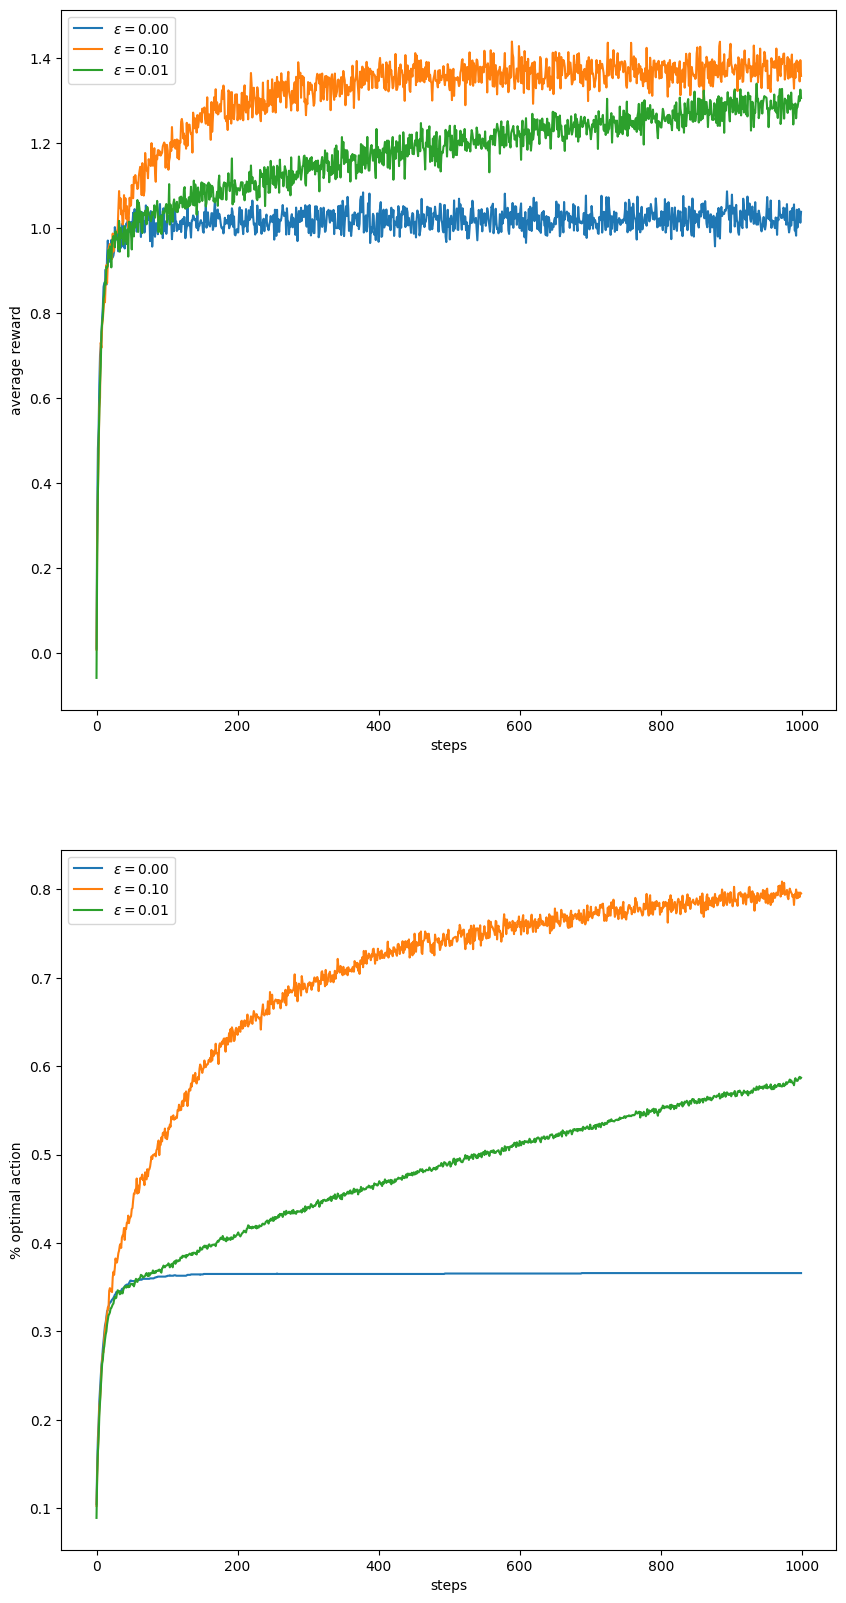

In [29]:
c2.figure_2_2(show=True, n_jobs=10) 

### exercise 2.5

In [30]:
# 练习2.5
# c2.exercise_2_5(show=True, runs=200, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.72
    init_q_true=[-0.73, 0.35, -0.45, -0.68, -0.36, -1.01, -0.09, -0.55, -0.42, -1.57] 
    q_true=[-0.62, 0.32, -0.33, -0.38, -0.1, -1.25, 0.25, -0.24, -0.3, -1.47]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.43, best_action_rate=0.72
    init_q_true=[0.25, 0.27, -0.7, -0.66, -0.04, 0.67, 0.97, -0.72, -0.44, 0.79] 
    q_true=[-0.24, -0.04, -0.98, -0.44, -0.05, 0.76, 0.82, -0.8, -0.73, 1.01]


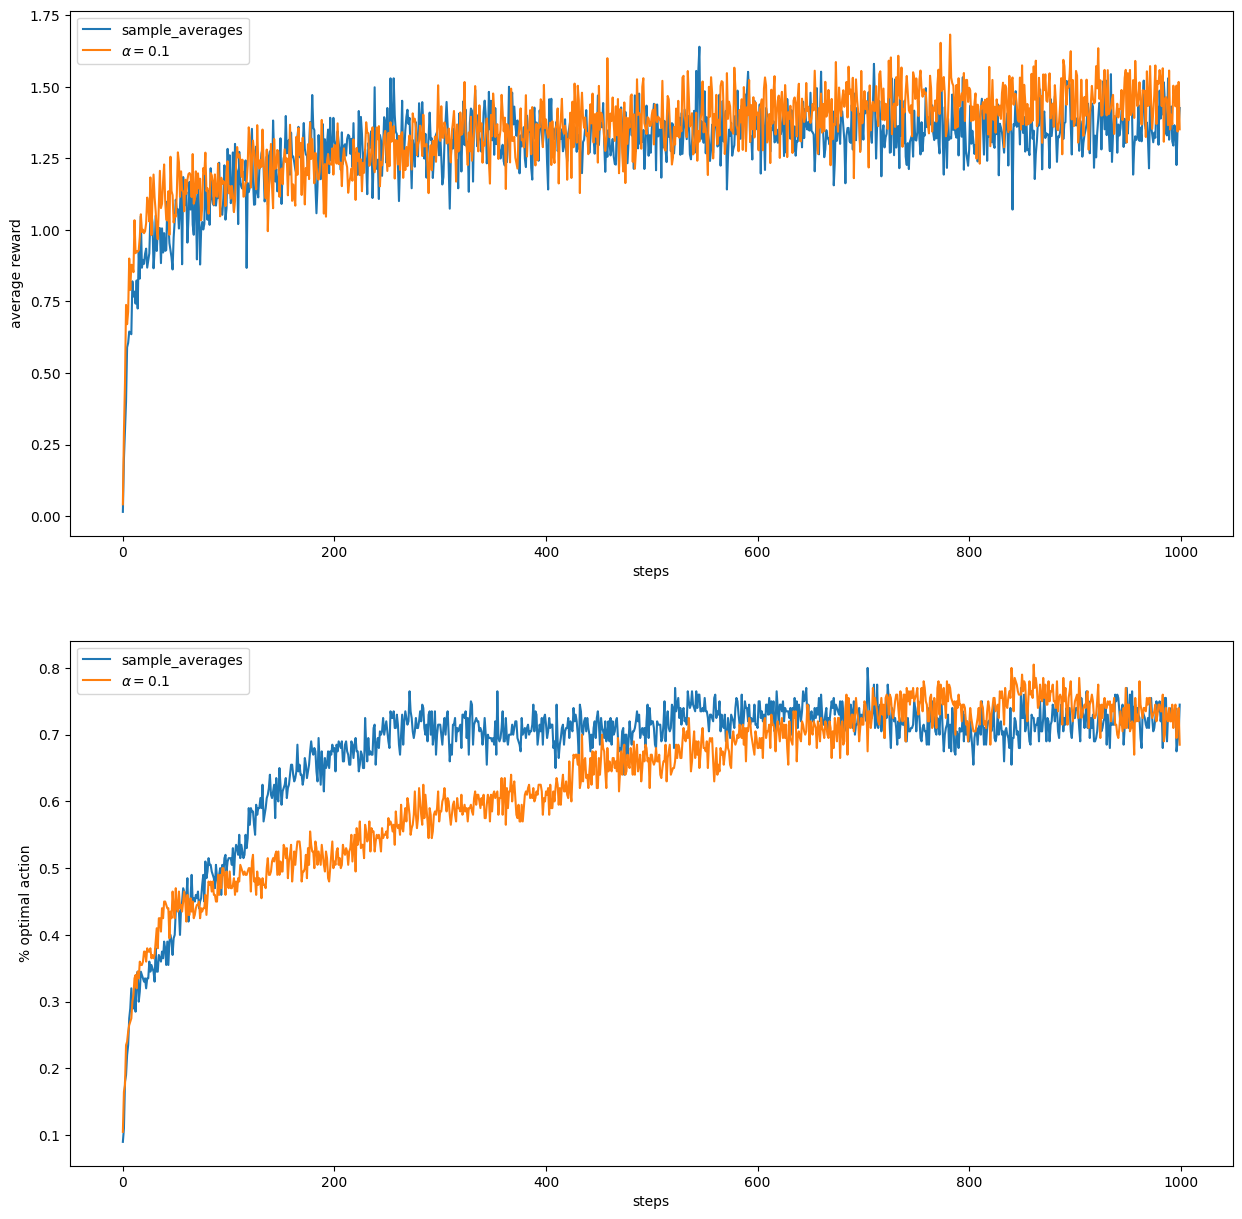

In [31]:
# 练习2.5
c2.exercise_2_5(show=True, runs=200, time=1000, n_jobs=10)

In [32]:
# c2.exercise_2_5(show=True, runs=2000, time=10000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.70, best_action_rate=0.61
    init_q_true=[0.7, -0.7, 0.55, 0.31, 0.44, 0.57, 0.06, 0.05, 0.46, -0.71] 
    q_true=[0.2, -0.21, -0.53, 1.02, -0.75, 0.49, 0.87, -0.52, 1.13, -0.75]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.82, best_action_rate=0.80
    init_q_true=[1.01, -1.23, -0.96, 0.02, -0.14, 0.54, 0.47, -0.63, -0.53, -0.23] 
    q_true=[1.1, -2.47, -1.2, 0.93, 1.16, -0.1, 0.4, 0.59, 2.44, -0.11]


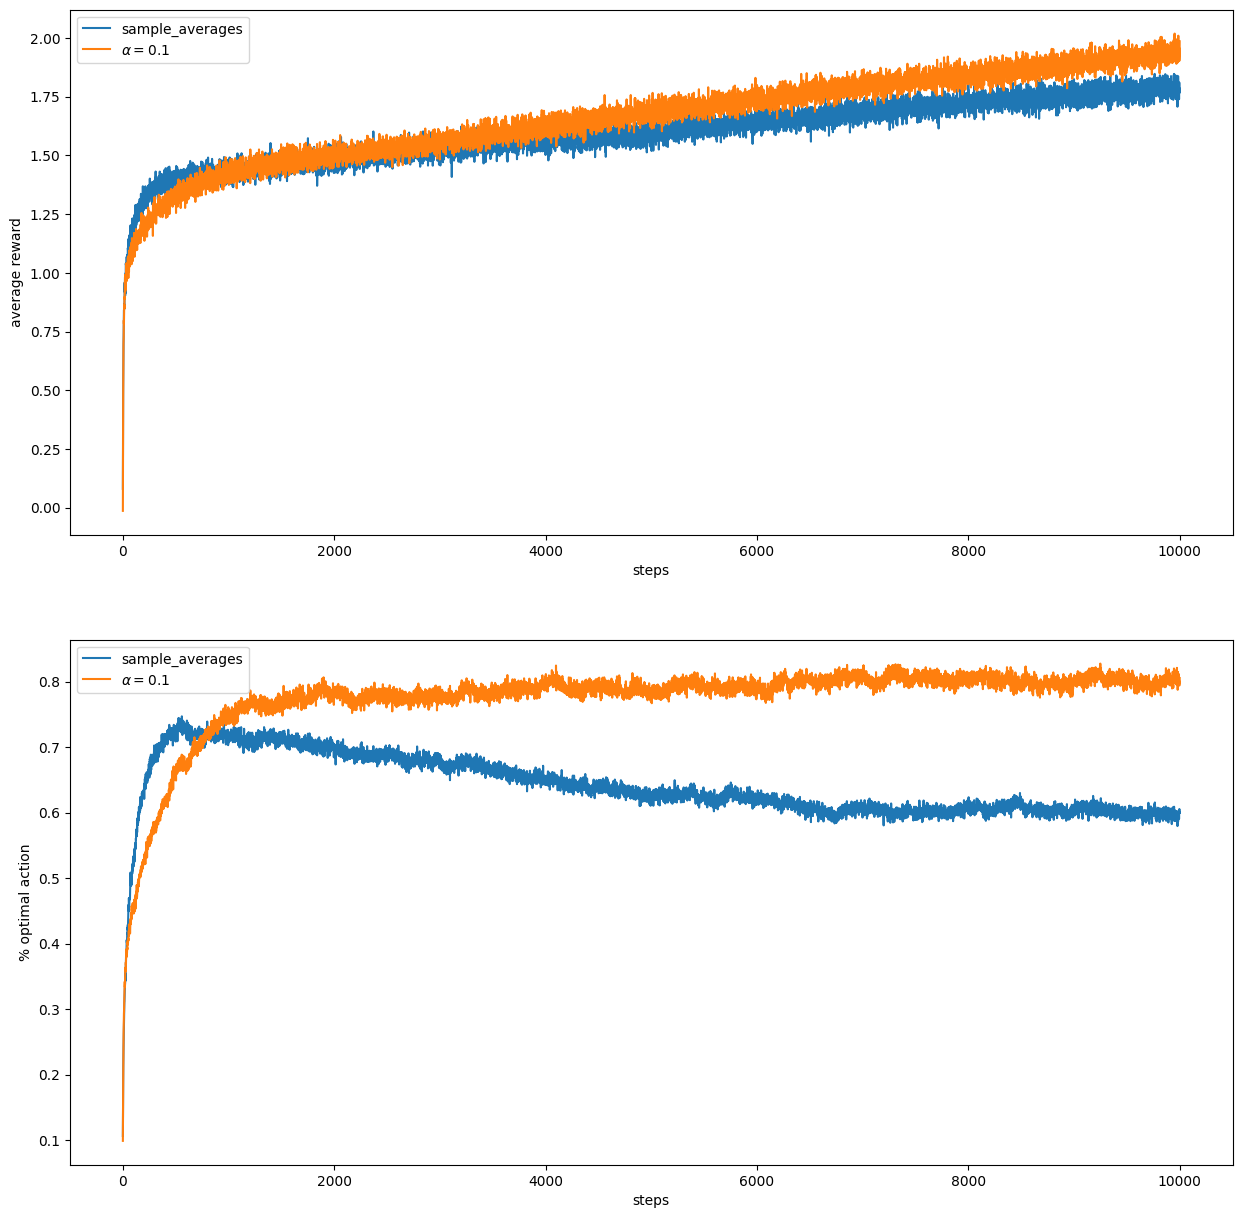

In [33]:
c2.exercise_2_5(show=True, runs=2000, time=10000, n_jobs=10) 

### figure 2.3

In [34]:
# c2.figure_2_3(show=True) 

Bandit(greedy, optimistic_initial=5, step_size=0.1)
    reward=1.47, best_action_rate=0.84
Bandit(ε-greedy=0.1, step_size=0.1)
    reward=1.33, best_action_rate=0.72


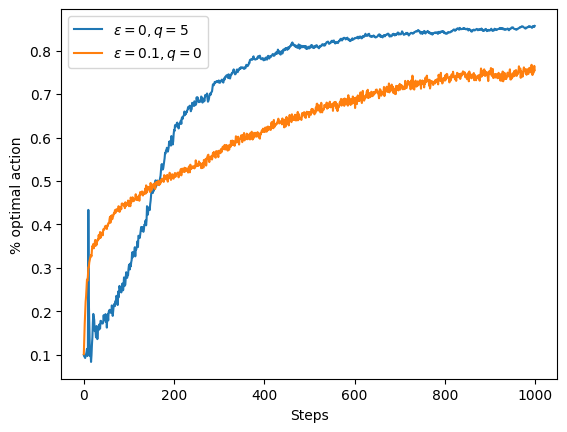

In [35]:
c2.figure_2_3(show=True, n_jobs=10) 

### figure 2.4

In [36]:
# c2.figure_2_4(show=True) 

Bandit(greedy, UCB_param=2, sample_averages)
    reward=1.46, best_action_rate=0.83
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.78


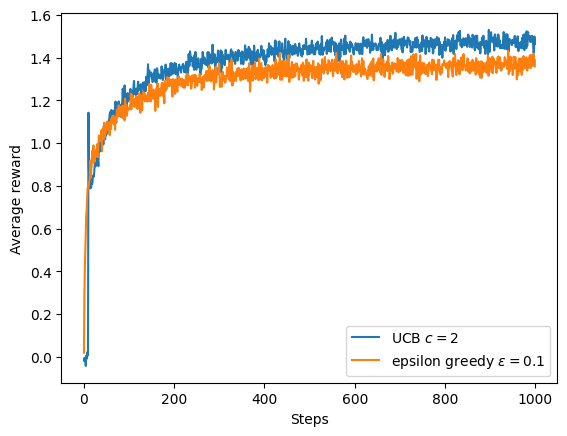

In [37]:
c2.figure_2_4(show=True, n_jobs=15) 

### figure 2.5

In [38]:
# c2.figure_2_5(show=True) 

Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.1)
    reward=5.49, best_action_rate=0.84
Bandit(true_reward=4, greedy, gradient, step_size=0.1)
    reward=5.16, best_action_rate=0.46
Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.4)
    reward=5.46, best_action_rate=0.71
Bandit(true_reward=4, greedy, gradient, step_size=0.4)
    reward=4.80, best_action_rate=0.28


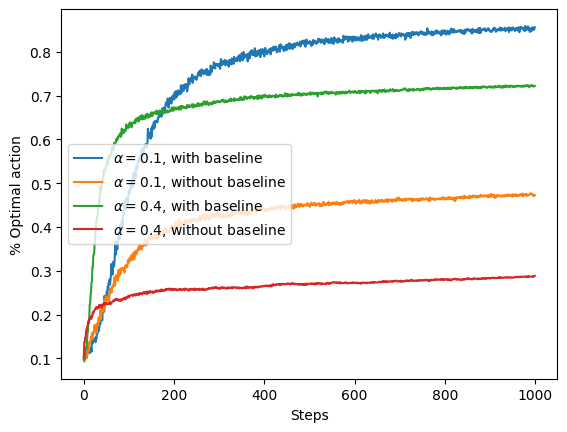

In [39]:
c2.figure_2_5(show=True, n_jobs=10) 

In [40]:
# c2.figure_2_5(show=True, true_reward=0) 

Bandit(greedy, gradient_baseline, step_size=0.1)
    reward=1.48, best_action_rate=0.84
Bandit(greedy, gradient, step_size=0.1)
    reward=1.49, best_action_rate=0.83
Bandit(greedy, gradient_baseline, step_size=0.4)
    reward=1.45, best_action_rate=0.72
Bandit(greedy, gradient, step_size=0.4)
    reward=1.42, best_action_rate=0.69


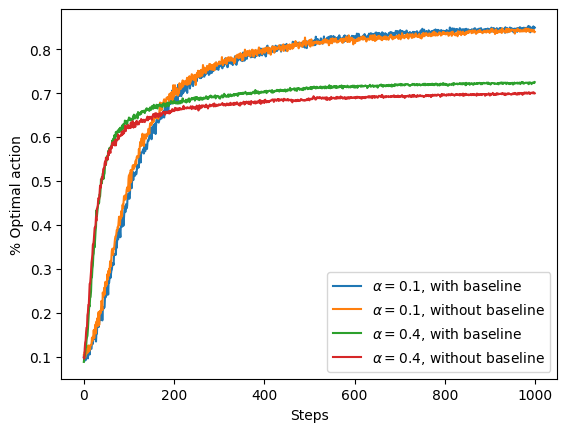

In [41]:
c2.figure_2_5(show=True, true_reward=0, n_jobs=10) 

### figure 2.6

In [42]:
# c2.figure_2_6(show=True) 

Bandit(ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.52
Bandit(ε-greedy=0.015625, sample_averages)
    reward=1.32, best_action_rate=0.62
Bandit(ε-greedy=0.03125, sample_averages)
    reward=1.40, best_action_rate=0.73
Bandit(ε-greedy=0.0625, sample_averages)
    reward=1.39, best_action_rate=0.77
Bandit(ε-greedy=0.125, sample_averages)
    reward=1.33, best_action_rate=0.78
Bandit(ε-greedy=0.25, sample_averages)
    reward=1.14, best_action_rate=0.70
Bandit(ε-greedy=0.0078125, step_size=0.1)
    reward=1.28, best_action_rate=0.55
Bandit(ε-greedy=0.015625, step_size=0.1)
    reward=1.30, best_action_rate=0.57
Bandit(ε-greedy=0.03125, step_size=0.1)
    reward=1.34, best_action_rate=0.64
Bandit(ε-greedy=0.0625, step_size=0.1)
    reward=1.34, best_action_rate=0.68
Bandit(ε-greedy=0.125, step_size=0.1)
    reward=1.30, best_action_rate=0.72
Bandit(ε-greedy=0.25, step_size=0.1)
    reward=1.14, best_action_rate=0.66
Bandit(greedy, gradient_baseline, step_size=0.

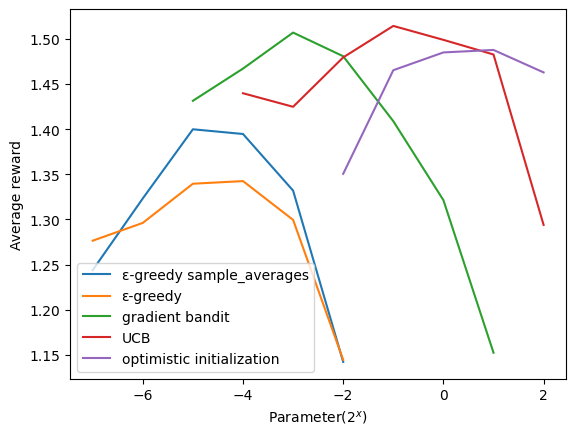

In [43]:
c2.figure_2_6(show=True, n_jobs=10) 

### exercise 2.11

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.45
    init_q_true=[-0.02, -0.6, -0.06, 0.9, 0.83, 0.17, 1.7, -0.33, -0.51, -0.18] 
    q_true=[-0.22, -0.41, -0.11, 1.43, 0.78, 0.43, 2.26, -0.16, -0.95, -0.22]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=1.37, best_action_rate=0.57
    init_q_true=[1.22, -1.59, 2.09, 0.12, 0.36, -1.09, 0.21, -1.31, -0.1, -0.65] 
    q_true=[1.29, -1.66, 2.32, 0.02, 0.33, -1.56, 0.06, -2.14, 0.09, -1.05]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=1.38, best_action_rate=0.60
    init_q_true=[1.67, 0.73, -1.56, 0.23, -0.69, 0.11, 1.07, 0.58, 1.84, 0.86] 
    q_true=[1.77, 0.73, -1.76, 0.66, -0.99, 0.33, 0.52, 0.51, 2.15, 0.66]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=1.51, best_action_rate=0.74
    init_q_true=[-1.39, -1.37, -0.36, 1

Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=0.5, sample_averages)
    reward=1.61, best_action_rate=0.80
    init_q_true=[0.01, -0.36, -1.71, 1.02, -1.21, 0.47, 0.07, 1.76, -0.32, -0.54] 
    q_true=[-0.09, 0.06, -1.16, 1.06, -1.2, 0.22, 0.2, 1.69, 0.26, -0.5]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=1.0, sample_averages)
    reward=1.58, best_action_rate=0.87
    init_q_true=[1.51, -0.57, -0.28, -1.17, 1.93, -1.28, -1.7, 0.78, 1.11, 0.97] 
    q_true=[1.29, -1.19, -0.09, -0.74, 1.38, -1.37, -2.21, 0.39, 1.43, 1.07]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=2.0, sample_averages)
    reward=1.66, best_action_rate=0.86
    init_q_true=[-0.49, -0.16, -0.73, 0.17, -0.35, 0.99, 0.84, 0.54, 0.87, 2.01] 
    q_true=[-0.67, -0.11, -1.08, 0.64, -0.17, 1.39, 0.53, 1.4, 1.28, 2.12]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=4.0, sample_averages)
    reward=1.34, best_action_rate=0.68
    init_q_true=[-0.

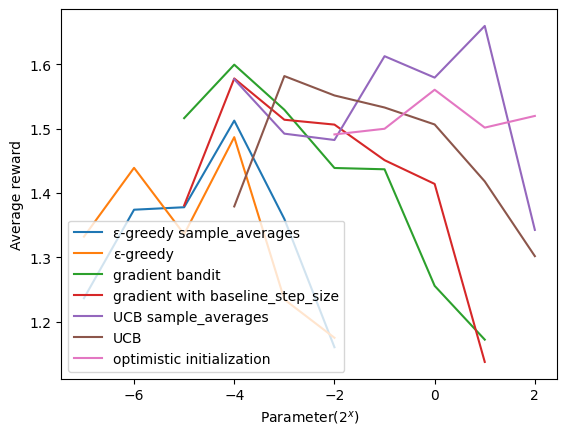

In [44]:
c2.exercise_2_11(show=True, runs=100, time=1000, n_jobs=10) 

In [45]:
# c2.exercise_2_11(show=True, runs=100, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=2.10, best_action_rate=0.59
    init_q_true=[0.2, -1.01, -1.08, 0.37, 0.32, 0.4, -0.84, -0.06, 1.17, -0.67] 
    q_true=[-0.26, 0.72, -0.59, 0.76, 0.35, 0.21, -1.36, -0.16, 0.83, -2.91]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=2.06, best_action_rate=0.58
    init_q_true=[-0.45, 0.76, -1.03, 1.25, -0.87, -0.34, 0.1, 0.15, 0.59, -1.39] 
    q_true=[0.91, -0.07, -1.65, 2.76, 0.46, -0.76, -0.42, -0.81, -1.79, -1.96]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=2.05, best_action_rate=0.59
    init_q_true=[0.32, -0.52, -1.57, 2.82, 0.5, 1.59, -0.82, -0.17, -0.66, -1.13] 
    q_true=[1.02, 0.55, 0.65, 4.52, 1.87, 1.53, -3.96, 0.17, -0.25, -2.18]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=2.01, best_action_rate=0.58
    init_q_true=[-1.09, 1.53, 0.0

Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=0.5, sample_averages)
    reward=2.01, best_action_rate=0.54
    init_q_true=[0.55, 0.14, -0.72, -1.27, -1.5, -1.82, 1.16, -0.4, 0.35, -0.08] 
    q_true=[-0.56, 1.35, 0.73, -2.05, -2.74, -3.0, -1.6, -0.52, 1.22, 2.88]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=1.0, sample_averages)
    reward=2.14, best_action_rate=0.61
    init_q_true=[-0.23, -2.06, -0.54, 0.25, 0.4, -0.96, 1.8, -0.08, -0.87, 0.65] 
    q_true=[-1.37, -0.26, -1.37, 1.88, 0.51, 1.61, 0.43, -1.0, -1.08, -0.59]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=2.0, sample_averages)
    reward=2.20, best_action_rate=0.67
    init_q_true=[-0.69, -0.21, 1.1, 0.94, 1.4, -0.23, 0.65, -0.16, 2.52, 0.34] 
    q_true=[-2.6, 0.99, 2.78, 2.54, -0.81, 1.02, 2.47, -0.96, 0.39, -0.31]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=4.0, sample_averages)
    reward=2.22, best_action_rate=0.70
    init_q_true=[-1.

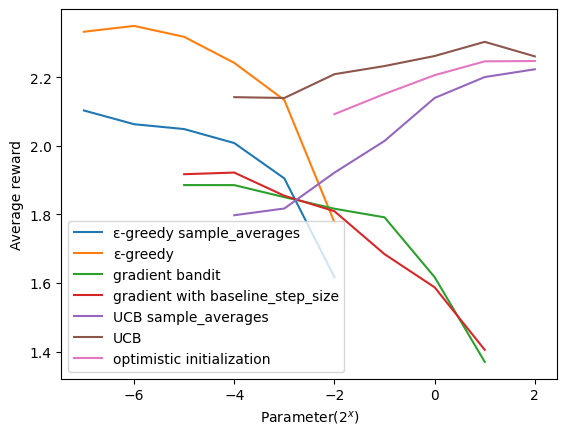

In [46]:
c2.exercise_2_11(show=True, runs=2000, time=20000, n_jobs=18)

In [47]:
#c2.exercise_2_11(show=True, runs=2000, time=20000) 

## chapter 3

### figure_3_2

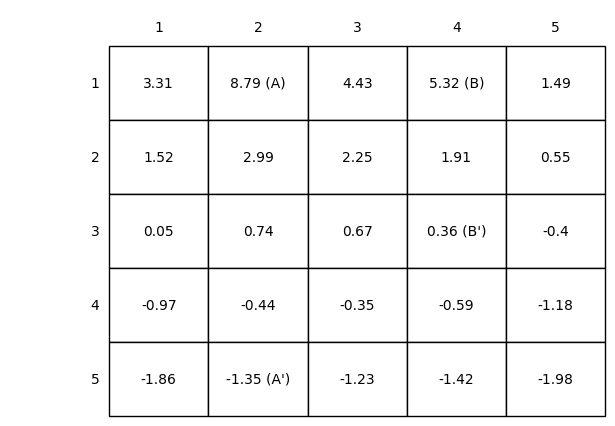

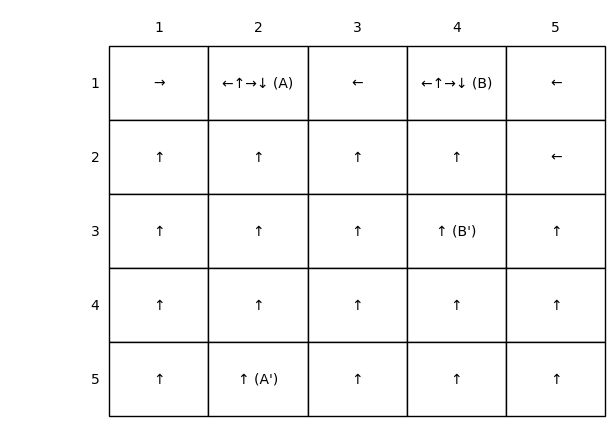

after 77 iteration the status value function converges


In [15]:
c3.figure_3_2(True)

### figure_3_2_linear_system

这个线性方程组 $Ax = b$ 的设定非常巧妙。

- 对角线为 $-1$
- 其他节点 $(i, j)$ 表示 $\pi(a|s)  \gamma$

其中的任一方程构建过程如下。第一个根据贝尔曼方程可得：

$$
\begin{split}\begin{aligned}
v_\pi(s) &= \sum_a \pi(a|s)  [r+\gamma v_\pi(s^a)] \\
\sum_a \pi(a|s)  \gamma v_\pi(s^a) - v_\pi(s) &= -\sum_a \pi(a|s) r \\
\begin{bmatrix} \pi(south|s)\gamma & \pi(north|s)\gamma & \pi(east|s)\gamma & \pi(west|s)\gamma & -1 \end{bmatrix} \begin{bmatrix} v_\pi(s^{north}) \\ v_\pi(s^{south}) \\ v_\pi(s^{east}) \\ v_\pi(s^{west}) \\ v_\pi(s) \end{bmatrix} &= -\sum_a \pi(a|s) r
\end{aligned}\end{split}
$$

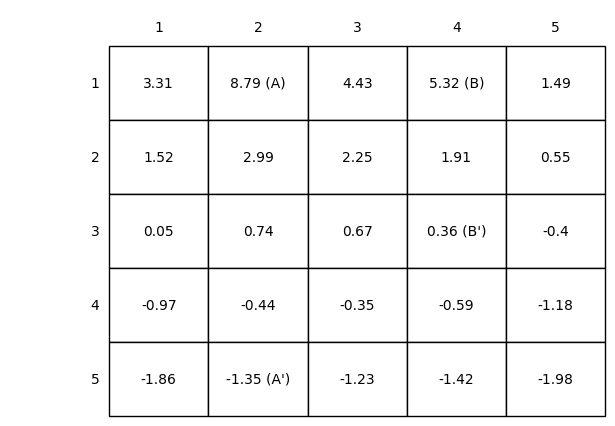

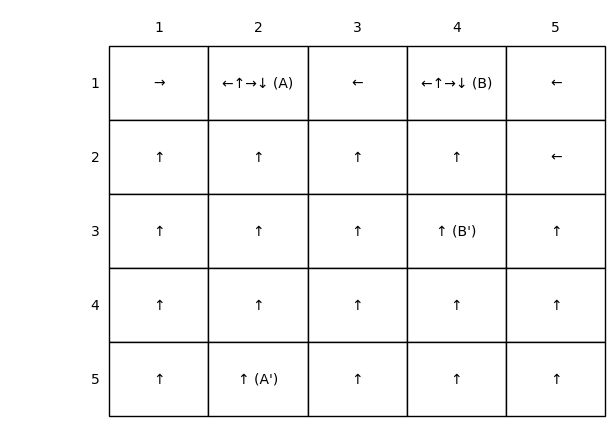

In [14]:
c3.figure_3_2_linear_system(True)

### figure_3_5

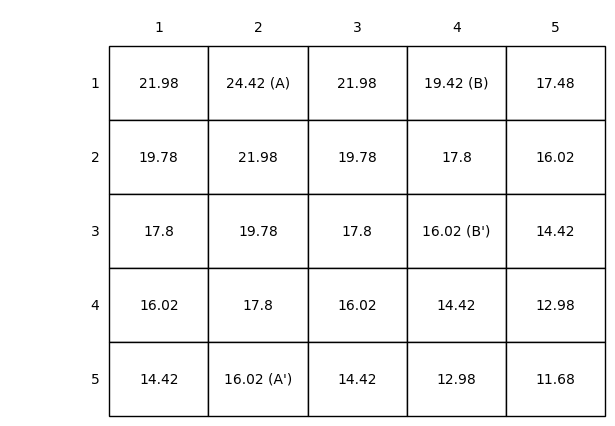

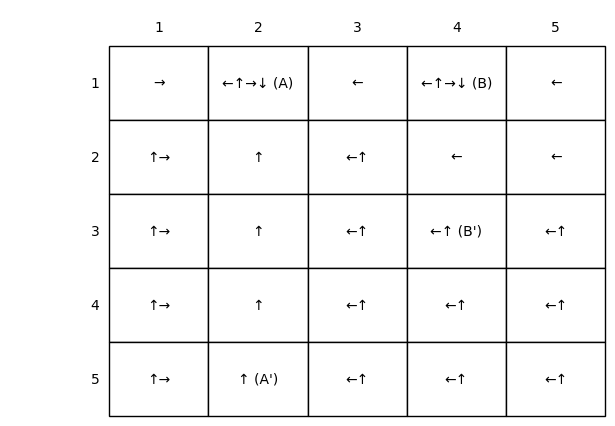

after 124 iteration the status value function converges


In [16]:
c3.figure_3_5(True)

## chapter 4

### figure_4_1

看起来 In-place 迭代次数要少，但是由于 Synchronous 可以并发处理，所以可能还是Synchronous更快。

In-place: 113 iterations


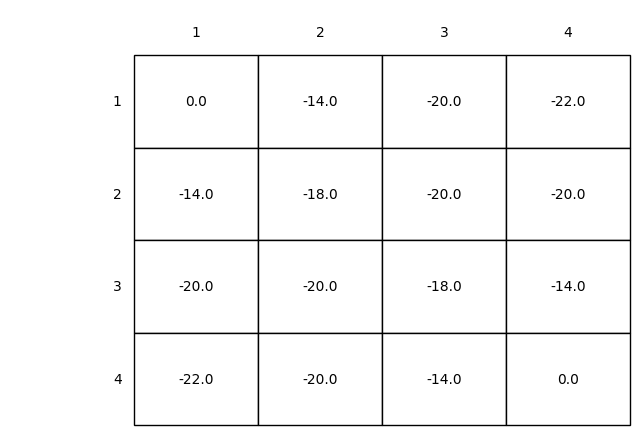

Synchronous: 172 iterations


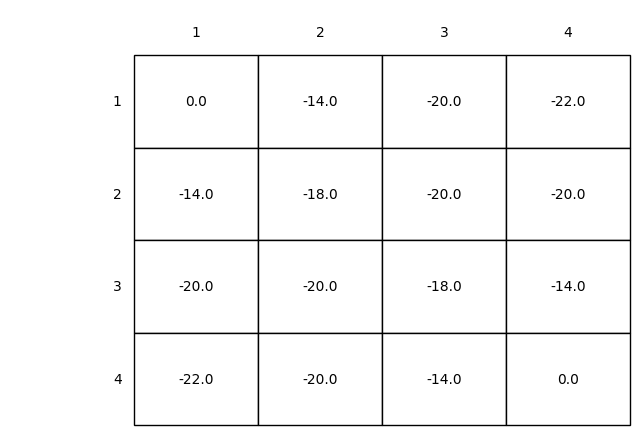

In [14]:
# 价值评估  
#                 value = 0
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = value
c4.grid_world.figure_4_1(True)

In-place: 3 iterations


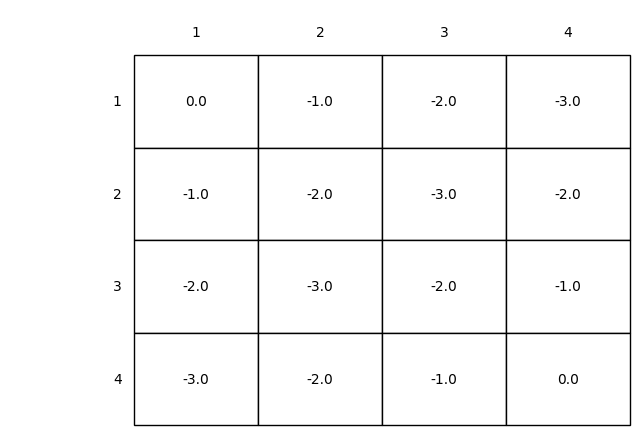

Synchronous: 3 iterations


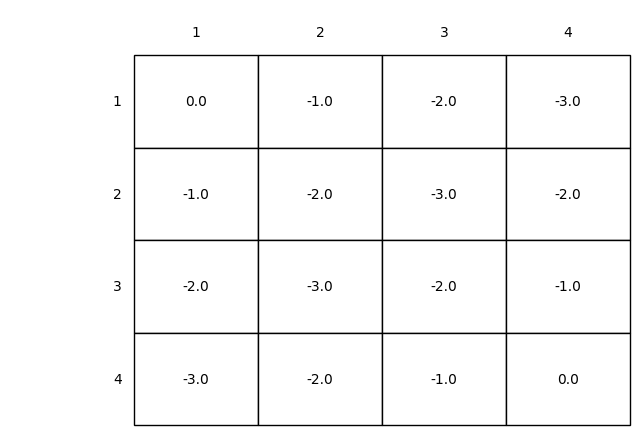

In [16]:
# 价值迭代  
#                 values = []
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     values.append(reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = np.max(values)
c4.grid_world.figure_4_11(True)

### figure_4_2

**例4.2: 杰克汽车出租** 杰克为一个全国性的汽车租赁公司管理两个网点。每天，一些顾客会到网点租车。每租一辆车，杰克可以从租赁公司得到 10 美元报酬。但如果租车时，该网点没车，这次生意就泡汤了。汽车返回来后，还可以再次出租。为了保证网点有车，杰克可以在晚上把车在两个网点转移，每次转移的成本是 2 美元。为了简化问题，我们进行如下假定：

- 每个网点汽车需要的数量和返回的数量是泊松随机变量（Poisson random variables），也就是数量是 n 的概率为 $\frac{\lambda^n}{n!}e^{-\lambda}$。两个网点的租车需求 $\lambda $ 分别是 $3$ 和 $4$，而返回的数量的 $\lambda$ 分别是 $3$ 和 $2$。
- 每个网点的车辆不会超过20辆（任何多余的车都将会被送回租赁公司，从问题中消失）
- 一个晚上，最多五辆车可以进行转移。 
- 衰减因子 $\gamma=0.9$。

这个问题可以看做连续有限MDP，时间步骤是天数， 状态是每天结束时网点剩余车子的数量，动作是每晚车子在两个网点之间转移的净数量。 图4.2展示的是：从不转移任何车子的策略开始，到通过策略迭代找到的一系列策略。


In [ ]:
value, policy = c4.car_rental.figure_4_2(in_place=True, constant_returned_cars=True, show=True) 

In [21]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

In [ ]:
value, policy = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=True, show=True) 

In [145]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

In [148]:
# 如果还车也是用泊松分布，就会非常非常慢
# value, policy = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=False, show=True) 

In [ ]:
# 自己写的方法，基本参考了c4.car_rental
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=True, max_car_num=max_car_num, theta=1e-4, constant_return=True, verbose=True)
v, pi = rental.run()

after 10 iteration: delta=19.40385808254939
after 20 iteration: delta=4.252112693842776
after 30 iteration: delta=0.8720029351049448
after 40 iteration: delta=0.1737691018435612


In [151]:
print(np.round(v[0:10, 0:10]))
print(pi)

[[364. 374. 384. 394. 403. 413. 422. 431. 439. 447.]
 [373. 383. 393. 403. 413. 422. 432. 440. 449. 457.]
 [382. 391. 401. 411. 421. 431. 440. 449. 457. 465.]
 [388. 396. 406. 416. 427. 437. 446. 455. 464. 472.]
 [386. 396. 406. 420. 428. 435. 447. 456. 468. 476.]
 [389. 399. 409. 419. 433. 440. 450. 459. 467. 475.]
 [389. 399. 409. 421. 435. 443. 452. 461. 469. 477.]
 [390. 400. 410. 420. 437. 442. 452. 463. 471. 479.]
 [392. 402. 412. 422. 439. 444. 454. 462. 471. 478.]
 [394. 404. 414. 430. 441. 447. 456. 464. 472. 480.]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  3 -1 -2  3  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  3  3 -1 -2 -2 -2 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1 -1  0  0]
 [ 4  4  4  3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1 -1  0]
 [ 4  4

In [ ]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, constant_return=True, verbose=True)
v, pi = rental.run()

In [ ]:
print(np.round(v[0:10, 0:10]))
print(pi)

### exercise 4.7 


练习4.7（编程）杰克汽车出租问题出现了如下变化，编写一个策略迭代程序解决它。

- 杰克第一个网点的有一个员工每晚乘公共汽车回家，其家就在第二个网点的附近。如果刚好有车需要从第一个网点转移到第二个网点，她将搭这辆车，此次转移车辆花费为 0（相当于该员工支付了 2 美元的费用）。其它转移车辆还是需要花费 2 美元。
- 杰克每个网点停车位有限。如果超过10个的话，多出的车辆必须停在第二个停车场，而这需要额外话费 4 美元（无论多出几辆车）。

在现实问题中，经常会有像这样的非线性和有些随意的需求。除了动态规划（dynamic programming），其他优化方法往往不容易解决。为了验证你的程序，首先复现一下原始问题的结果。

In [138]:
policy

array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -3, -3,
        -3, -3, -4, -4, -4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -2, -2, -2,
        -2, -3, -3, -3, -3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        -2, -2, -2, -2, -2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1, -1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1],
       [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 2,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  2,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  3,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [ ]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, constant_return=True, verbose=True)
v, pi = rental.run()

In [ ]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(max_car_num=max_car_num, theta=1e-4, constant_return=True, verbose=True)

# 无法收敛，由于动作的随意性太大。
v, pi = rental.run(fun=rental.expected_return_my)

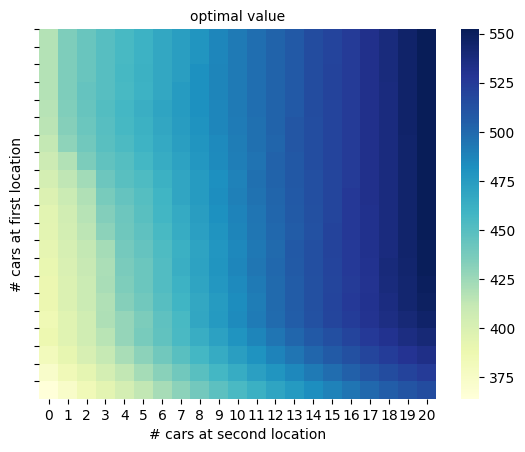

In [115]:
import seaborn as sns 
fig = sns.heatmap(np.flipud(v), cmap="YlGnBu")
fig.set_ylabel('# cars at first location', fontsize=10)
fig.set_yticks(list(reversed(range(max_car_num + 1))))
fig.set_xlabel('# cars at second location', fontsize=10)
fig.set_title('optimal value', fontsize=10)

plt.show() 

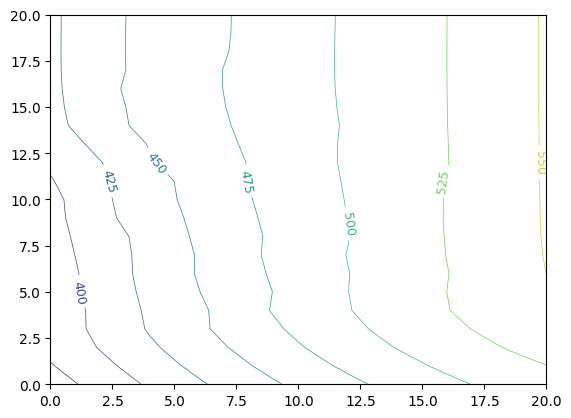

In [109]:
max_car_num = 20
x = np.arange(0,max_car_num+1,1)
y = np.arange(0,max_car_num+1,1) 
x, y = np.meshgrid(x, y)

cs = plt.contour(x,y,v,linewidths=0.5) 

plt.clabel(cs,fontsize=9,inline=True)

plt.show() 

In [133]:
_, axes = plt.subplots(2, 3, figsize=(40, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
# axes = axes.flatten()
axes.shape

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [ ]:
axes.shape

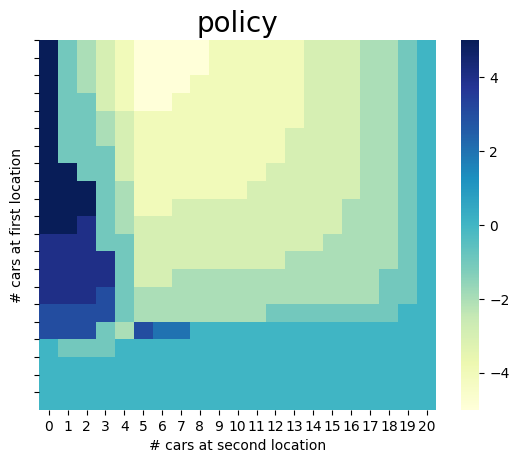

In [131]:
fig = sns.heatmap(np.flipud(pi), cmap="YlGnBu")
fig.set_ylabel('# cars at first location', fontsize=10)  
fig.set_yticks(list(reversed(range(max_car_num + 1))))
fig.set_xlabel('# cars at second location', fontsize=10)
fig.set_title('policy', fontsize=20)

plt.show()

In [125]:
np.testing.assert_array_almost_equal(pi, policy)

AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 357 / 441 (81%)
Max absolute difference: 8
Max relative difference: 6.
 x: array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,...
 y: array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -3, -3,
        -3, -3, -4, -4, -4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -2, -2, -2,...

In [126]:
policy

array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -3, -3,
        -3, -3, -4, -4, -4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -2, -2, -2,
        -2, -3, -3, -3, -3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        -2, -2, -2, -2, -2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1, -1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1],
       [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 2,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  2,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  3,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [127]:
pi 

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  3,  3, -1, -2,  3,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 3,  3,  3,  3, -1, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1,
        -1, -1, -1,  0,  0],
       [ 4,  4,  4,  3, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
        -2, -2, -1, -1,  0],
       [ 4,  4,  4,  4, -1, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2,
        -2, -2, -1, -1,  0],
       [ 4,  4,  4,  4, -1, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2,
        -2, -2, -2, -1,  0],
       [ 4,  4,  4, -1, -1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -2,
        -2, -2, -2,

In [8]:
import numpy as np 
    
# creating an array 
gfg = [1, 2, 3, 4, 5, 6]
print("Original array:")
display(gfg)  

# using resize()
print("Changed array")
display(gfg.resize(2, 3)) 
  
# using reshape()
print("Changed array")
display(gfg.reshape(2, 3)) 
    
print("Original array:")
display(gfg)

Original array:


[1, 2, 3, 4, 5, 6]

Changed array


AttributeError: 'list' object has no attribute 'resize'

In [7]:
x = 5
def func_a():
    print(x)
def func_b():
    print(x)
def func_c():
    global x 
    x = x + 1
    print(x)    
    
func_a()
func_b()
func_c()

5
5
6
